In [9]:
import os
import sys

sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.utils.constants import HOME_DIR, DATA_DIR

In [10]:
data_path = DATA_DIR + 'full_data.txt'
full_data = pd.read_csv(data_path, sep='\t')
full_data

,CASRN,DTXSID,Chemical_Name,Structure_Source,Canonical_QSARr,Salt_Solvent,InChI_Code_QSARr,InChI_Key_QSARr,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category
0,100-00-5,DTXSID5020281,1-Chloro-4-nitrobenzene,EPA_DSSTox,[O-][N+](=O)C1C=CC(Cl)=CC=1,?,InChI=1S/C6H4ClNO2/c7-5-1-3-6(4-2-5)8(9)10/h1-4H,CZGCEKJOLUNIFY-UHFFFAOYSA-N,False,False,460.00,2.0,4.0
1,100-01-6,DTXSID8020961,4-Nitroaniline,EPA_DSSTox,NC1=CC=C(C=C1)[N+]([O-])=O,?,InChI=1S/C6H6N2O2/c7-5-1-3-6(4-2-5)8(9)10/h1-4...,TYMLOMAKGOJONV-UHFFFAOYSA-N,False,False,750.00,3.0,4.0
2,100-02-7,DTXSID0021834,4-Nitrophenol,EPA_DSSTox,[O-][N+](=O)C1C=CC(O)=CC=1,?,"InChI=1S/C6H5NO3/c8-6-3-1-5(2-4-6)7(9)10/h1-4,8H",BTJIUGUIPKRLHP-UHFFFAOYSA-N,False,False,170.00,2.0,3.0
3,100-14-1,DTXSID4025745,4-Nitrobenzyl chloride,EPA_DSSTox,[O-][N+](=O)C1C=CC(CCl)=CC=1,?,InChI=1S/C7H6ClNO2/c8-5-6-1-3-7(4-2-6)9(10)11/...,KGCNHWXDPDPSBV-UHFFFAOYSA-N,False,False,1809.00,3.0,4.0
4,100-15-2,DTXSID7025635,N-Methyl-4-nitroaniline,EPA_DSSTox,CNC1C=CC(=CC=1)[N+]([O-])=O,?,InChI=1S/C7H8N2O2/c1-8-6-2-4-7(5-3-6)9(10)11/h...,XIFJZJPMHNUGRA-UHFFFAOYSA-N,False,True,NaN,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,999-01-9,DTXSID0073245,"Phosphonothioic acid, O,O-diethyl ester",EPA_DSSTox,CCOP(=S)OCC,?,"InChI=1S/C4H11O2PS/c1-3-5-7(8)6-4-2/h7H,3-4H2,...",KZRRLRUEAGCJRA-UHFFFAOYSA-N,False,False,200.00,2.0,3.0
8990,999-34-8,DTXSID80244288,"Phosphonodithious acid, methyl-, dipropyl ester",EPA_DSSTox,CP(SCCC)SCCC,?,InChI=1S/C7H17PS2/c1-4-6-9-8(3)10-7-5-2/h4-7H2...,HKDYILGABRVNTF-UHFFFAOYSA-N,True,False,2.24,1.0,1.0
8991,999-61-1,DTXSID0022143,2-Hydroxypropyl acrylate,EPA_DSSTox,CC(O)COC(=O)C=C,?,"InChI=1S/C6H10O3/c1-3-6(8)9-4-5(2)7/h3,5,7H,1,...",GWZMWHWAWHPNHN-UHFFFAOYSA-N,False,False,250.00,2.0,3.0
8992,999-81-5,DTXSID6020303,Chlormequat chloride,EPA_DSSTox,C[N+](C)(C)CCCl,[Cl-],"InChI=1S/C5H13ClN/c1-7(2,3)5-4-6/h4-5H2,1-3H3/q+1",JUZXDNPBRPUIOR-UHFFFAOYSA-N,False,False,600.00,3.0,4.0


In [11]:
# Create a smaller dataset with only the columns we need
data = full_data[['Chemical_Name', 'Canonical_QSARr', 'LD50_mgkg']]
data = data.dropna()

# Renumber the indices
data.index = range(len(data))


data

,Chemical_Name,Canonical_QSARr,LD50_mgkg
0,1-Chloro-4-nitrobenzene,[O-][N+](=O)C1C=CC(Cl)=CC=1,460.00
1,4-Nitroaniline,NC1=CC=C(C=C1)[N+]([O-])=O,750.00
2,4-Nitrophenol,[O-][N+](=O)C1C=CC(O)=CC=1,170.00
3,4-Nitrobenzyl chloride,[O-][N+](=O)C1C=CC(CCl)=CC=1,1809.00
4,p-Nitroanisole,COC1C=CC(=CC=1)[N+]([O-])=O,2300.00
...,...,...,...
5301,"Phosphonothioic acid, O,O-diethyl ester",CCOP(=S)OCC,200.00
5302,"Phosphonodithious acid, methyl-, dipropyl ester",CP(SCCC)SCCC,2.24
5303,2-Hydroxypropyl acrylate,CC(O)COC(=O)C=C,250.00
5304,Chlormequat chloride,C[N+](C)(C)CCCl,600.00


In [12]:
# Create a function that changes a SMILES string to a canonical SMILES string
from rdkit import Chem
from rdkit.Chem import AllChem

def canonical_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Chem.MolToSmiles(mol)

# Apply the function to the Canonical_QSARr column
data['Canonical_QSARr'] = data['Canonical_QSARr'].apply(canonical_smiles)

# Rename Canonical_QSARr column to Canonical_SMILES
data = data.rename(columns={'Canonical_QSARr': 'Canonical_SMILES'})

# Drop column 'Chemical_Name'
data = data.drop(columns='Chemical_Name')


In [13]:
data

,Canonical_SMILES,LD50_mgkg
0,O=[N+]([O-])c1ccc(Cl)cc1,460.00
1,Nc1ccc([N+](=O)[O-])cc1,750.00
2,O=[N+]([O-])c1ccc(O)cc1,170.00
3,O=[N+]([O-])c1ccc(CCl)cc1,1809.00
4,COc1ccc([N+](=O)[O-])cc1,2300.00
...,...,...
5301,CCO[PH](=S)OCC,200.00
5302,CCCSP(C)SCCC,2.24
5303,C=CC(=O)OCC(C)O,250.00
5304,C[N+](C)(C)CCCl,600.00


In [14]:
# Save to a new CSV file
data.to_csv(DATA_DIR + 'clean_data.csv', index=False)

In [15]:
data = pd.read_csv(DATA_DIR + 'clean_data.csv')

# Split the data into train/test/validation sets
val_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.1)
train_size = len(data) - val_size - test_size

np.random.seed(42)
indices = np.random.permutation(data.index)

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

train_data = data.loc[train_indices]
val_data = data.loc[val_indices]
test_data = data.loc[test_indices]

train_data.to_csv(DATA_DIR + 'splits/train.csv', index=False)
val_data.to_csv(DATA_DIR + 'splits/val.csv', index=False)
test_data.to_csv(DATA_DIR + 'splits/test.csv', index=False)

In [31]:
jules_data = '/Users/junhalee/Desktop/CHEM 263/Final Project/drug_toxicology_prediction/data/full_data_jules.txt'
jules_data = pd.read_csv(jules_data, sep='\t')
# Only keep ones that has 'Rat' in 'Species' column
jules_data = jules_data[jules_data['Species'] == 'Rat']

# Only keep ones that have non NaN values in 'SMILES' column
jules_data = jules_data.dropna(subset=['SMILES'])

# Only keep ones that have 'In Vivo' in 'Data_Type' column
jules_data = jules_data[jules_data['Data_Type'] == 'In Vivo']

# Only keep ones that have 'LD50' in 'Endpoint' column
jules_data = jules_data[jules_data['Endpoint'] == 'LD50']

# Only keep ones that have 'Rat Acute Oral Toxicity' in 'Assay' column
jules_data = jules_data[jules_data['Assay'] == 'Rat Acute Oral Toxicity']

# Only keep ones that have 'mg/kg' in 'Units' column
jules_data = jules_data[jules_data['Response_Unit'] == 'mg/kg']

# 'Chemical' in 'Mixture' column
jules_data = jules_data[jules_data['Mixture'] == 'Chemical']

# Keep only 'NaN' values in 'Response Modifier' column
jules_data = jules_data[jules_data['Response_Modifier'].isnull()]

# Drop columns 'Record_ID', 'Data_Type', 'Species', 'CASRN', 'Chemical_Name', 'Formulation_ID', 'Formulation_Name', 'DTXSID'
jules_data = jules_data.drop(columns=['Record_ID', 'Data_Type', 'Species', 'CASRN', 'Chemical_Name', 'Formulation_ID', 'Formulation_Name', 'DTXSID', 'Endpoint', 'Assay', 'Percent_Active_Ingredient', 'Response_Unit', 'Sex', 'Mixture', 'Reference', 'URL', 'Preferred_Name', 'URL_CEBS', 'URL_CompTox', 'Synonyms', 'Response_Modifier'])

# Use function to convert 'SMILES' column to 'Canonical_SMILES' column
jules_data['SMILES'] = jules_data['SMILES'].apply(canonical_smiles)

# Change 'SMILES' column to 'Canonical_SMILES' column
jules_data = jules_data.rename(columns={'SMILES': 'Canonical_SMILES'})

# Rename 'Response' column to 'LD50_mgkg'
jules_data = jules_data.rename(columns={'Response': 'LD50_mgkg'})

# Delete duplicate entries in 'Canonical_SMILES' column (keep first entry)
jules_data = jules_data.drop_duplicates(subset=['Canonical_SMILES'])

# Renumber the indices
jules_data = jules_data.reset_index(drop=True)


jules_data


,LD50_mgkg,Canonical_SMILES
0,25.0,CCCP(=O)(OC)SC
1,930.0,O=c1[nH]c(=O)n(C2CCCO2)cc1F
2,2820.0,CN(CCO)c1ccc(N=Nc2c(Cl)cc([N+](=O)[O-])cc2Cl)cc1
3,18000.0,Cc1ccc(S(=O)(=O)NC(=O)N[C@H]2[C@H]3CC[C@@](C)(...
4,62.0,BrC=CBr
...,...,...
6621,1260.0,COc1ccc(CCNCC(O)COc2ccc(OCC(C)=O)c3c2CCC(O)=N3...
6622,1310.0,CCC1N=C(O)c2ccccc2O1
6623,1110.0,Cc1ncc2c(c1O)CSSC2.Cl
6624,3280.0,CC(=O)OC(C(Cl)(Cl)Cl)P(=O)(Oc1ccccc1)Oc1ccccc1


In [24]:
# save to a new CSV file
jules_data.to_csv(DATA_DIR + 'clean_data_jules.csv', index=False)

In [25]:
junha_data = '/Users/junhalee/Desktop/CHEM 263/Final Project/drug_toxicology_prediction/data/clean_data.csv'
jules_data = '/Users/junhalee/Desktop/CHEM 263/Final Project/drug_toxicology_prediction/data/clean_data_jules.csv'

junha_data = pd.read_csv(junha_data)
jules_data = pd.read_csv(jules_data)

In [26]:
junha_data

,Canonical_SMILES,LD50_mgkg
0,O=[N+]([O-])c1ccc(Cl)cc1,460.00
1,Nc1ccc([N+](=O)[O-])cc1,750.00
2,O=[N+]([O-])c1ccc(O)cc1,170.00
3,O=[N+]([O-])c1ccc(CCl)cc1,1809.00
4,COc1ccc([N+](=O)[O-])cc1,2300.00
...,...,...
5301,CCO[PH](=S)OCC,200.00
5302,CCCSP(C)SCCC,2.24
5303,C=CC(=O)OCC(C)O,250.00
5304,C[N+](C)(C)CCCl,600.00


In [28]:
jules_data

,LD50_mgkg,Canonical_SMILES
0,25.0,CCCP(=O)(OC)SC
1,930.0,O=c1[nH]c(=O)n(C2CCCO2)cc1F
2,2820.0,CN(CCO)c1ccc(N=Nc2c(Cl)cc([N+](=O)[O-])cc2Cl)cc1
3,18000.0,Cc1ccc(S(=O)(=O)NC(=O)N[C@H]2[C@H]3CC[C@@](C)(...
4,62.0,BrC=CBr
...,...,...
6621,1260.0,COc1ccc(CCNCC(O)COc2ccc(OCC(C)=O)c3c2CCC(O)=N3...
6622,1310.0,CCC1N=C(O)c2ccccc2O1
6623,1110.0,Cc1ncc2c(c1O)CSSC2.Cl
6624,3280.0,CC(=O)OC(C(Cl)(Cl)Cl)P(=O)(Oc1ccccc1)Oc1ccccc1


In [ ]:
# Merge the two datasets



In [27]:
# Find the intersection of the two datasets
intersection = pd.merge(junha_data, jules_data, on='Canonical_SMILES', how='inner')
intersection

,Canonical_SMILES,LD50_mgkg_x,LD50_mgkg_y
0,O=[N+]([O-])c1ccc(Cl)cc1,460.00,294.00
1,Nc1ccc([N+](=O)[O-])cc1,750.00,1410.00
2,O=[N+]([O-])c1ccc(O)cc1,170.00,170.00
3,O=[N+]([O-])c1ccc(CCl)cc1,1809.00,1809.00
4,COc1ccc([N+](=O)[O-])cc1,2300.00,2300.00
...,...,...,...
4277,CCCCP(CCCC)CCCC,750.00,750.00
4278,CCO[PH](=S)OCC,200.00,200.00
4279,CCCSP(C)SCCC,2.24,2.24
4280,C=CC(=O)OCC(C)O,250.00,250.00


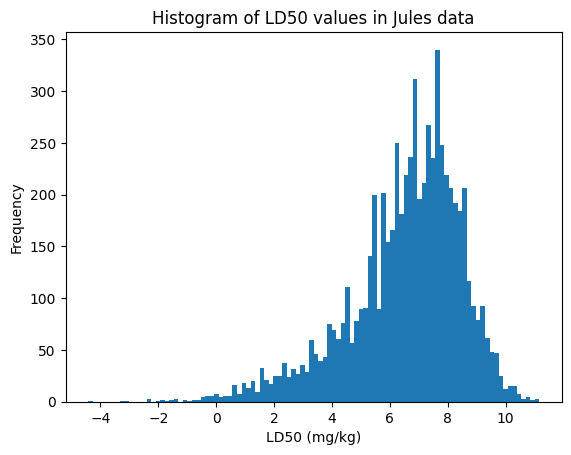

In [30]:
# histogram of jules_data['LD50_mgkg']
plt.hist(np.log(jules_data['LD50_mgkg']), bins=100)
plt.xlabel('LD50 (mg/kg)')
plt.ylabel('Frequency')
plt.title('Histogram of LD50 values in Jules data')
plt.show()
